In [1]:
from numpy import *
import cv2 as cv
import matplotlib.pyplot as plt
from random import randint
%matplotlib widget


In [2]:
#1080p points
p1_ = array([[469, 413, 1], 
             [1461, 371, 1], 
             [167, 725, 1], 
             [1475, 854, 1],
             [736, 408, 1],
             [1129, 418, 1],
             [625, 579, 1],
             [1133, 644, 1]])
p2_ = array([[418, 358, 1], 
             [1451, 324, 1], 
             [414, 766, 1], 
             [1870, 769, 1],
             [760, 355, 1],
             [1196, 369, 1],
             [829, 555, 1],
             [1419, 600, 1]])


p2_skew = array(zeros((len(p2_), 3, 3)), ndmin=3)
for i in range(len(p2_)):
    p2_skew[i] = [[0, -p2_[i, 2], p2_[i, 1]], 
                  [p2_[i, 2], 0, -p2_[i, 0]], 
                  [-p2_[i, 1], p2_[i, 0], 0]]

xs = [ kron(p1_[i], p2_skew[i]) for i in range (len(p1_)) ]
chi = vstack(xs)
print(chi.shape)
X = chi.T @ chi
print(X.shape)

(24, 9)
(9, 9)


In [3]:
ux, sx, vhx = linalg.svd(X,full_matrices=False)
HLs = vhx.T[:, -1]
HL = HLs.reshape(3, 3).T
u, s, vh = linalg.svd(HL)

In [4]:
s2 = s[1]
H = HL/s2
j = array(zeros((len(p1_), 3)), ndmin=2)
for i in range (len(p1_)):
    j[i] = p2_[i].T @ H @ p1_[i]
H = -H

In [5]:
sign = array(zeros((len(p1_))), ndmin=1)
for i in range(len(p1_)):
    sign[i] = p2_[i,:].T @ H @ p1_[i, :]
v, s, vh = linalg.svd(H.T @ H)

In [6]:
u1 = (((1-s[2])**0.5*vh[0] + (s[0]-1)**0.5*vh[2])/((s[0]-s[2])**0.5))
u2 = (((1-s[2])**0.5*vh[0] - (s[0]-1)**0.5*vh[2])/((s[0]-s[2])**0.5))
v2hat = [[0, -vh[1, 2], vh[1, 1]],
         [vh[1, 2], 0, -vh[1,0]],
         [-vh[1,1], vh[1,0], 0]]
U1 = array(zeros((3, 3)), ndmin=2)
U1[0, :] = vh[1] 
U1[1, :] = u1
U1[2, :] = v2hat @ u1


U2 = array(zeros((3, 3)), ndmin=2)
U2[0, :] = vh[1] 
U2[1, :] = u2
U2[2, :] = v2hat @ u2

Hv2 = H@vh[1]
Hv2hat = [[0, -Hv2[2], Hv2[1]],
         [Hv2[2], 0, -Hv2[0]],
         [-Hv2[1], Hv2[0], 0]]

W1 = array(zeros((3, 3)), ndmin=2)
W1[0, :] = H @ vh[1] 
W1[1, :] = H @ u1
W1[2, :] = Hv2hat @ W1[1, :]

W2 = array(zeros((3, 3)), ndmin=2)
W2[0, :] = H @ vh[1] 
W2[1, :] = H @ u2
W2[2, :] = Hv2hat @ W2[1, :]


In [7]:
# Solution 1
R1 = W1.T @ U1.T
N1 = v2hat@u1
T1d = (H-R1)@N1
if N1[2] > 0:
    print("Solution 1:")
    print(R1)
    print(N1)
    print(T1d)
    #print(T1d-N1)


# Solution 2
R2 = W2.T @ U2.T
N2 = v2hat@u2
T2d = (H-R2)@N2
if N2[2] > 0:
    print("Solution 2:")
    print(R2)
    print(N2)
    print(T2d)
    #print(T2d-N2)

# Solution 3
R3 = R1
N3 = -N1
T3d = -T1d
if N3[2] > 0:
    print("Solution 3:")
    print(R3)
    print(N3)
    print(T3d)
    #print(T3d-N3)

# Solution 4
R4 = R2
N4 = -N2
T4d = -T2d
if N4[2] > 0:
    print("Solution 4:")
    print(R4)
    print(N4)
    print(T4d)
    #print(T4d-N4)

Solution 1:
[[ 0.99898574 -0.04499146 -0.00180281]
 [-0.04498505 -0.9989817   0.00345046]
 [-0.00195622 -0.00336586 -0.99999242]]
[-0.002661   -0.00220532  0.99999403]
[-916.68743175 -250.52350215    1.83614787]
Solution 4:
[[ 0.99898513  0.04498449 -0.0022598 ]
 [-0.04499008  0.99898435 -0.00248414]
 [ 0.00214576  0.00258329  0.99999436]]
[-6.57881543e-04 -1.55975705e-03  9.99998567e-01]
[-9.16688806e+02 -2.50513716e+02 -1.63808904e-01]


In [8]:
mtx1 = [[1563.4010009765625, 0.0, 986.95068359375],
        [0.0, 1561.4229736328125, 518.3526611328125],
        [0.0, 0.0, 1.0]]
mtx1 = array(mtx1)
mtx2 = [[1564.150634765625, 0.0, 954.2699584960938],
        [0.0, 1562.171630859375, 539.9055786132813],
        [0.0, 0.0, 1.0]]
mtx2 = array(mtx2)
T1 = T1d.reshape((3,1))
T2 = T2d.reshape((3,1))
T3 = T3d.reshape((3,1))
T4 = T4d.reshape((3,1))

In [9]:
#RT matrix for C1 is identity.
RT1 = concatenate([eye(3), [[0],[0],[0]]], axis = -1)
P1 = mtx1 @ RT1 #projection matrix for C1
 
#RT matrix for C2 is the R and T obtained from stereo calibration.
RT2 = concatenate([R4, T4], axis = -1)
P2 = mtx2 @ RT2 #projection matrix for C2

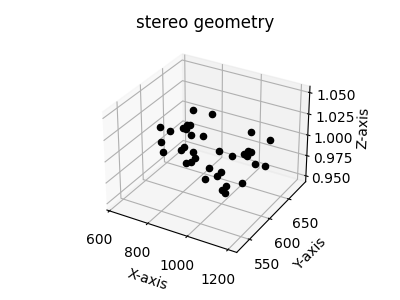

In [17]:

p3_ = array([[814, 597], [819, 588], [761, 573],
            [704, 592], [628, 624], [686, 621],
            [676, 682], [723, 635], [723, 646],
            [738, 635], [737, 647], [786, 626],
            [769, 685], [838, 632], [874, 591],
            [898, 565], [909, 571], [908, 580]])

p4_ = array([[1061, 568], [1064, 558], [1030, 546],
            [999,  570], [967,  610], [1041, 606],
            [1010, 668], [1078, 617], [1077, 627],
            [1094, 616], [1093, 627], [1155, 604],
            [1114, 663], [1200, 606], [1180, 560],
            [1161, 531], [1139, 535], [1140, 544]])
p3 = array(zeros((len(p3_), 3)), ndmin=2)
p4 = array(zeros((len(p4_), 3)), ndmin=2)
for i in range(len(p3)):
    p3[i, 0] = p3_[i, 0]
    p3[i, 1] = p3_[i, 1]
    p3[i, 2] = 1
    p4[i, 0] = p4_[i, 0]
    p4[i, 1] = p4_[i, 1]
    p4[i, 2] = 1

fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111,projection='3d')


# plot the world point
for i in range(len(p3)):
    ax.scatter(*p3[i], color="black")
    ax.scatter(*p4[i], color="black")

ax.set_title("stereo geometry")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

plt.show()

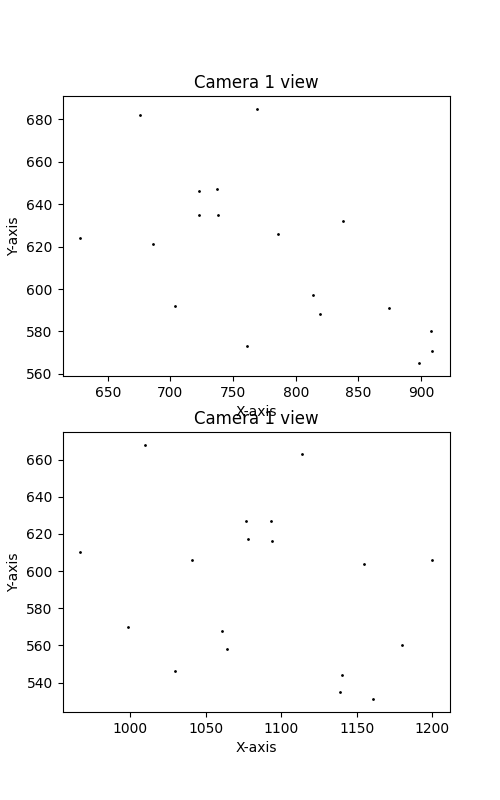

In [11]:
def project(p):
   ps = [ p[i] / p[i][2] for i in range (len(p)) ]
   return vstack(ps)
p3 = project(p3)
p4 = project(p4)

fig = plt.figure(figsize=(5, 8))

ax = fig.add_subplot(211)
for i in range(len(p3)):
    ax.scatter(*p3[i], color="black")

ax.set_title("Camera 1 view")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")

ax1 = fig.add_subplot(212)
for i in range(len(p4)):
    ax1.scatter(*p4[i], color="black")

ax1.set_title("Camera 1 view")
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis")

plt.show()

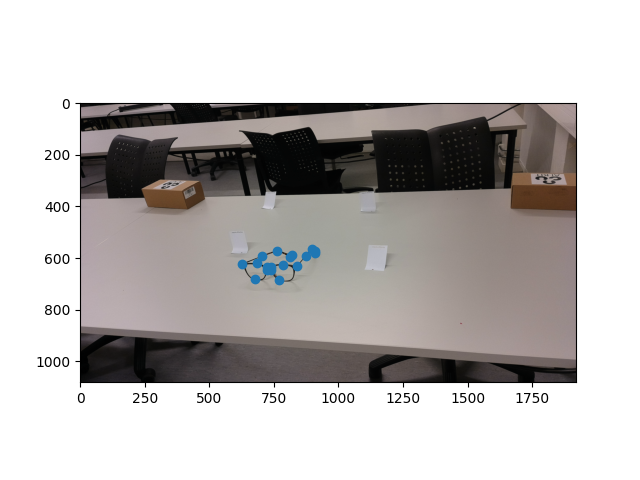

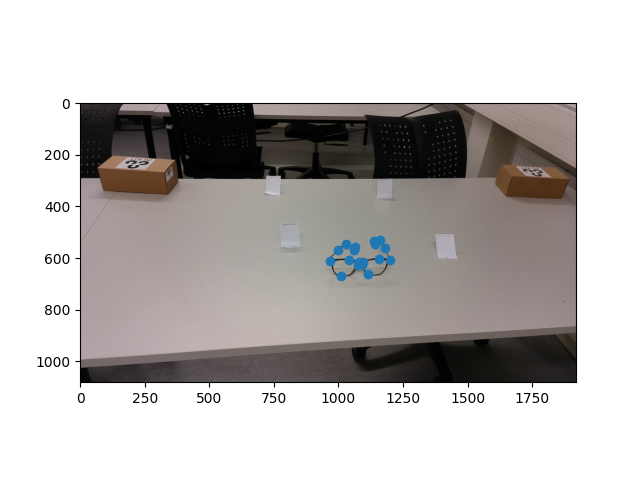

In [13]:
# This allways fails on first run
# just run in twice
plt.clf()
plt.cla()
plt.close()
frame1 = cv.imread('frame1glasses1.png')
frame2 = cv.imread('frame2glasses1.png')

plt.figure(1)
plt.imshow(frame1[:,:,[2,1,0]])
plt.scatter(p3[:,0], p3[:,1])
plt.show()

plt.figure(2)
plt.imshow(frame2[:,:,[2,1,0]])
plt.scatter(p4[:,0], p4[:,1])
plt.show()

In [14]:
def DLT(P1, P2, point1, point2):
 
    A = [point1[1]*P1[2,:] - P1[1,:],
         P1[0,:] - point1[0]*P1[2,:],
         point2[1]*P2[2,:] - P2[1,:],
         P2[0,:] - point2[0]*P2[2,:]
        ]
    A = array(A).reshape((4,4))
    #print('A: ')
    #print(A)
 
    B = A.transpose() @ A
    from scipy import linalg
    U, s, Vh = linalg.svd(B, full_matrices = False)
 
    print('Triangulated point: ')
    #print(Vh)
    print(Vh[3,0:3]/Vh[3,3])
    return Vh[3,0:3]/Vh[3,3]

In [15]:
p3ds = []
for uv1, uv2 in zip(p3_, p4_):
    _p3d = DLT(P1, P2, uv1, uv2)
    p3ds.append(_p3d)
p3ds = array(p3ds)


Triangulated point: 
[  572.62904112   -69.170302   -5809.6523873 ]
Triangulated point: 
[  557.63484356   -35.281662   -5849.54323158]
Triangulated point: 
[  705.09426988    29.29612382 -5342.24362148]
Triangulated point: 
[  824.08675664   -26.39092425 -4900.29474205]
Triangulated point: 
[  929.67870463  -102.37436522 -4297.3415429 ]
Triangulated point: 
[  735.00847687   -86.66831264 -4109.16957426]
Triangulated point: 
[  815.36448506  -273.41335788 -4386.89707426]
Triangulated point: 
[  638.86916936  -122.62076695 -4121.56718782]
Triangulated point: 
[  641.68288549  -151.73454784 -4141.22387527]
Triangulated point: 
[  597.57161849  -121.63511656 -4112.0527381 ]
Triangulated point: 
[  601.19383206  -152.5691696  -4121.13852144]
Triangulated point: 
[  453.39049802   -89.37050652 -3973.57754256]
Triangulated point: 
[  536.20205253  -266.00053207 -4270.21384471]
Triangulated point: 
[  327.44531203  -107.33664073 -4056.53310881]
Triangulated point: 
[  278.41043947   -16.63934

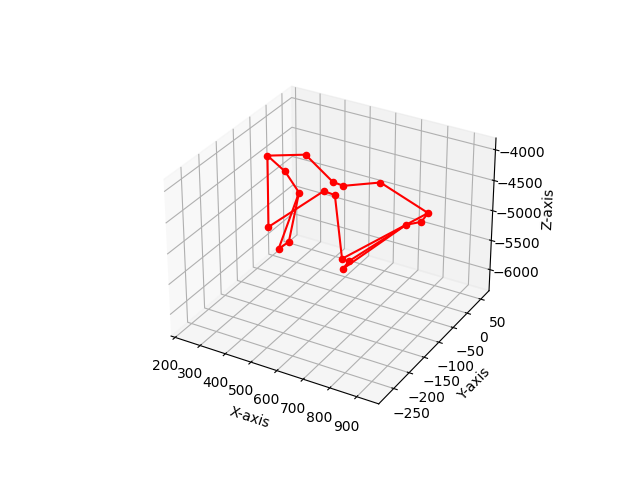

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(p3ds)):
    ax.scatter(*p3ds[i], color='red')
connections = [[0,1], [0,2], [1,2], [2,3], [3,4], 
               [4,5], [4,6], [5,7], [6,8], [7,9], 
               [8,10], [9,11], [10,12], [11,13], 
               [12,13], [13,14], [14, 15], [15,16], 
               [15,17], [16,17]]
for _c in connections:

    ax.plot(xs = [p3ds[_c[0],0], p3ds[_c[1],0]], ys = [p3ds[_c[0],1], p3ds[_c[1],1]], zs = [p3ds[_c[0],2], p3ds[_c[1],2]], c = 'red')
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.show()
